In [1]:
!pip install matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
eda = pd.read_csv('flights_data.csv')

In [4]:
eda.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
eda.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [7]:
eda.describe(include='object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [8]:
eda.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [9]:
eda.duplicated().sum() # Checking duplicate value

np.int64(0)

In [10]:
eda.drop('index', axis=1, inplace=True) # here axis=1 using to delete assigned column and axis=0 can use to delete assigned rows.
                                        # inplace=True will modify the existing data without creating any copy of the dataset.

In [11]:
eda.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [12]:
text_cols = eda.select_dtypes(include='object').columns  # Checking objective columns
text_cols

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [13]:
eda.value_counts('airline') # Checking total count against airlines

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [14]:
eda.groupby('airline').nunique()

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,,,,,,,,,,
AirAsia,115,6,6,3,6,6,1,189,49,649
Air_India,218,6,6,3,6,6,2,460,49,4943
GO_FIRST,205,6,6,3,6,6,1,191,49,1381
Indigo,704,6,6,3,6,6,1,146,49,3642
SpiceJet,186,6,5,2,6,6,1,219,49,1127
Vistara,133,6,5,3,6,6,2,392,49,5303


In [15]:
eda.select_dtypes(include='object').nunique() # Checking unique values of objetive columns

,0
airline,6
flight,1561
source_city,6
departure_time,6
stops,3
arrival_time,6
destination_city,6
class,2


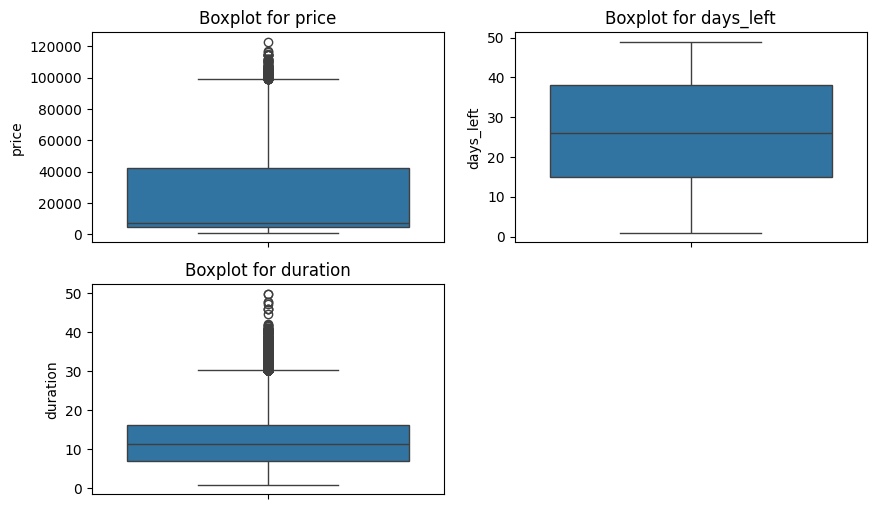

In [16]:
# check the outliers
num_cols =['price','days_left','duration']

plt.figure(figsize=(10,6))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(y=eda[col])
    plt.title(f"Boxplot for {col}")

In [17]:
# dealing with the outliers

def boxplot_details(eda,column):
    Q1= eda[column].quantile(25/100)
    Q2= eda[column].quantile(50/100)
    Q3= eda[column].quantile(75/100)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    eda[column] = np.where((eda[column]<lower_bound) | (eda[column]>upper_bound),Q2,eda[column])
    return eda

cols_outliers =[ 'price','duration']

for col in cols_outliers:
    df = boxplot_details(eda,col)

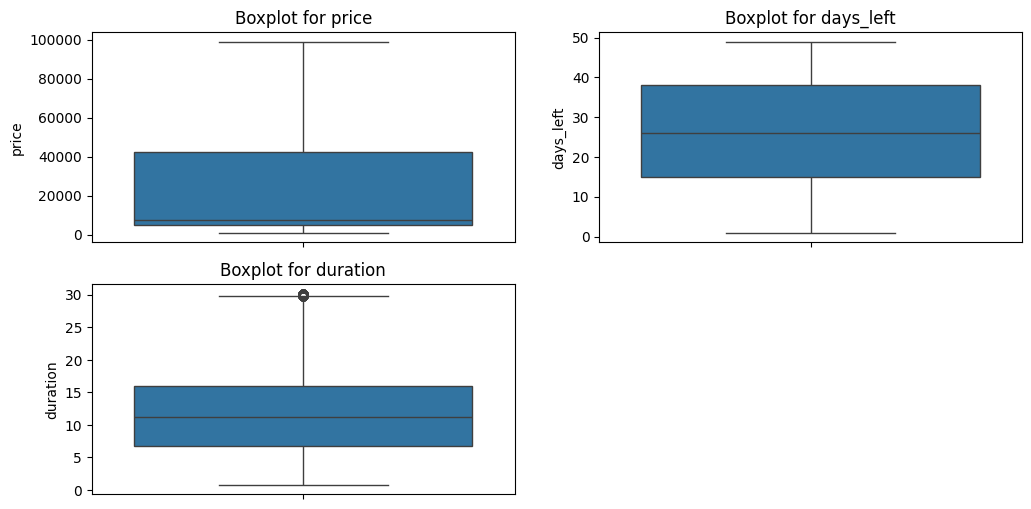

In [18]:
# check the outliers
num_cols =['price','days_left','duration']

plt.figure(figsize=(12,6))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(y=eda[col])
    plt.title(f"Boxplot for {col}")

In [19]:
# Visualizing the dataset with the help of multiple charts

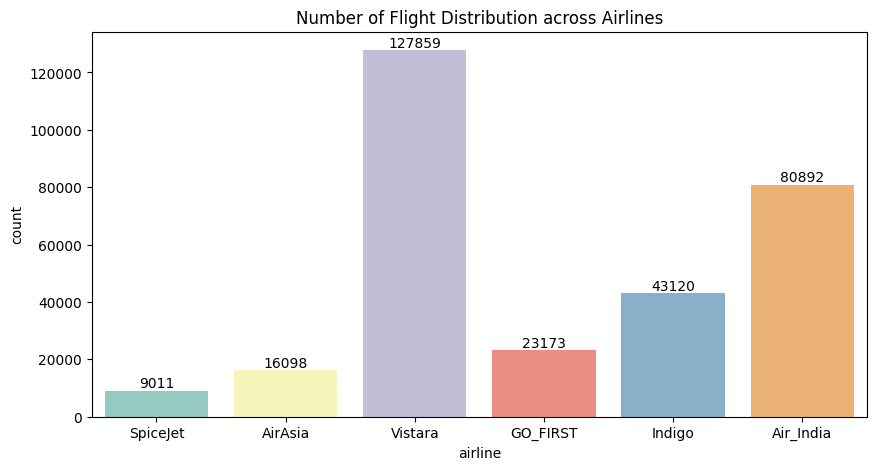

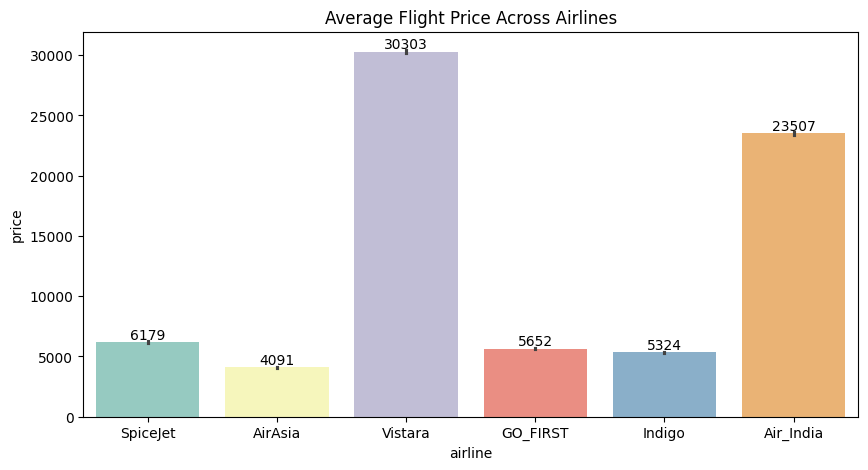

In [20]:
#Using countplot chart to check the number of flights across airlines and barplot chart to analyse the average prices of airlines
plt.figure(figsize=(10,5))
ax=sns.countplot(x=eda['airline'], hue=eda['airline'], palette='Set3')
for bar in ax.containers:
  ax.bar_label(bar)
plt.title('Number of Flight Distribution across Airlines')
plt.show()

plt.figure(figsize=(10,5))
ax = sns.barplot(data=eda, x='airline', y='price', hue= 'airline', estimator = 'mean', palette='Set3')
for bar in ax.containers:
  ax.bar_label(bar,fmt='%.0f')
plt.title('Average Flight Price Across Airlines')
plt.show()

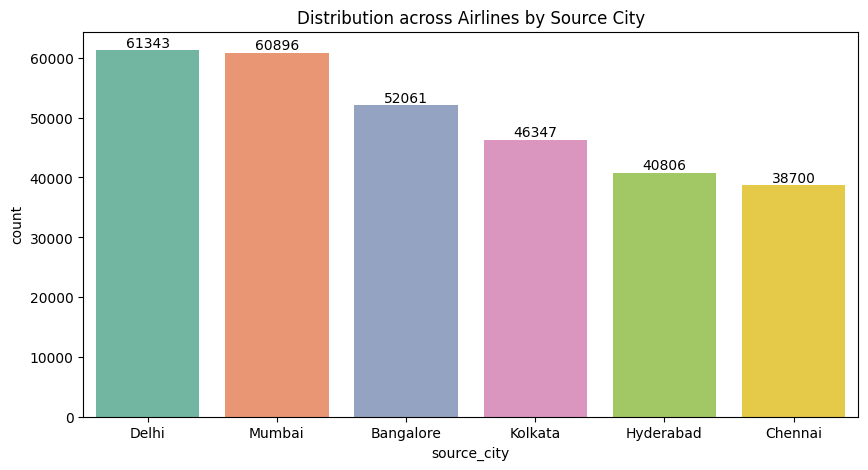

In [21]:
#Checking distribution of flights by source city
plt.figure(figsize=(10,5))
ax=sns.countplot(x=eda['source_city'], hue=eda['source_city'], palette='Set2')
for bar in ax.containers:
  ax.bar_label(bar)
plt.title('Distribution across Airlines by Source City')
plt.show()

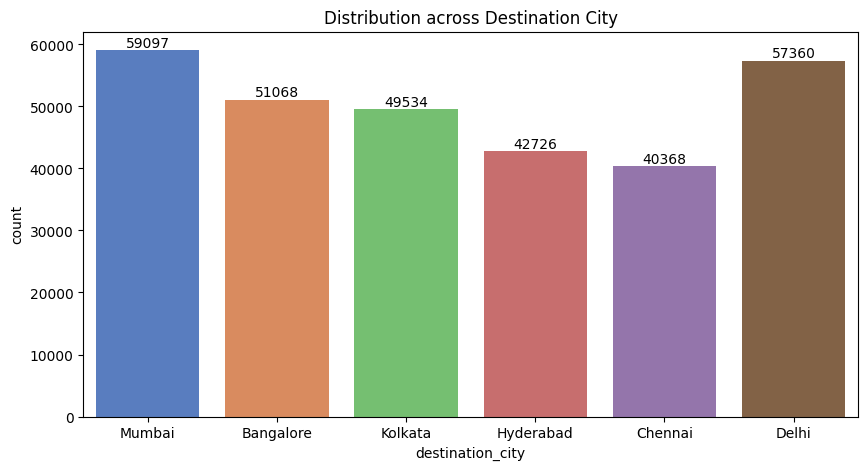

In [22]:
#Checking distribution of flights by destination city [Q- How to sort the chart from largest to smallest value]
plt.figure(figsize=(10,5))
ax=sns.countplot(x=eda['destination_city'], hue=eda['destination_city'], palette='muted')
for bar in ax.containers:
  ax.bar_label(bar)
plt.title('Distribution across Destination City')
plt.show()

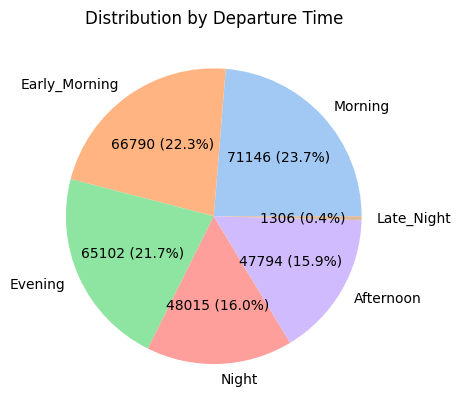

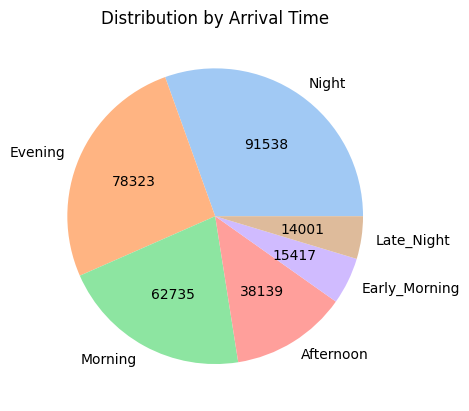

In [23]:
# Used Pie chart to analyse the passenger behaviour against departure and arrival time
# 1. Distribution by Departure Time
# Create a pie chart for the "class" column
eda["departure_time"].value_counts().plot.pie(
    autopct=lambda p: f"{int(round(p * eda['departure_time'].value_counts().sum() / 100))} ({p:.1f}%)",
# To show only percentage values use (autopct="%1.2f%%") with 2 decimal place
    colors=sns.color_palette("pastel")  # Used soft pastel colors, can use (Set1, Set2 & Set3)
)
plt.title("Distribution by Departure Time")
plt.ylabel("") # Hide the default y-axis label as it is not needed in pie chart
# Display the chart
plt.show()

# 2. Distribution by Arrival Time
eda["arrival_time"].value_counts().plot.pie(
   autopct=lambda p: f"{int(round(p * eda['departure_time'].value_counts().sum() / 100))}",
   colors=sns.color_palette("pastel"))
plt.title("Distribution by Arrival Time")
plt.ylabel("")
plt.show()

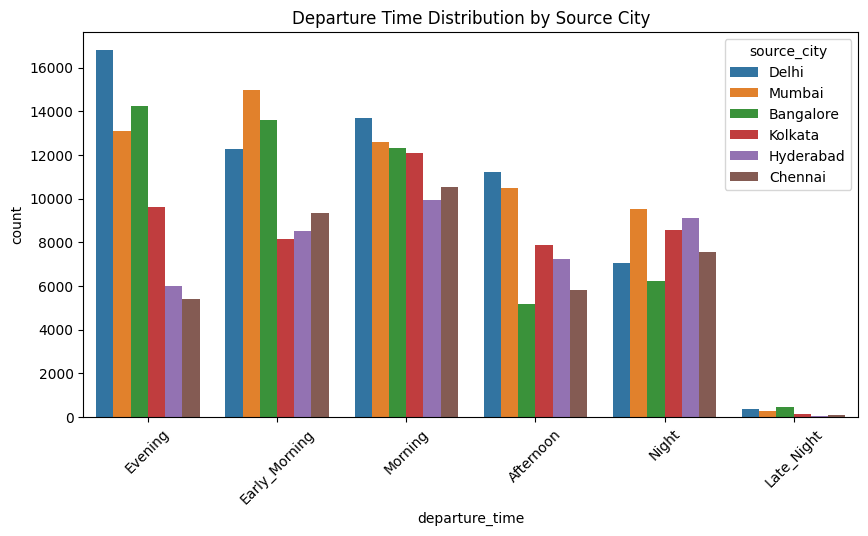

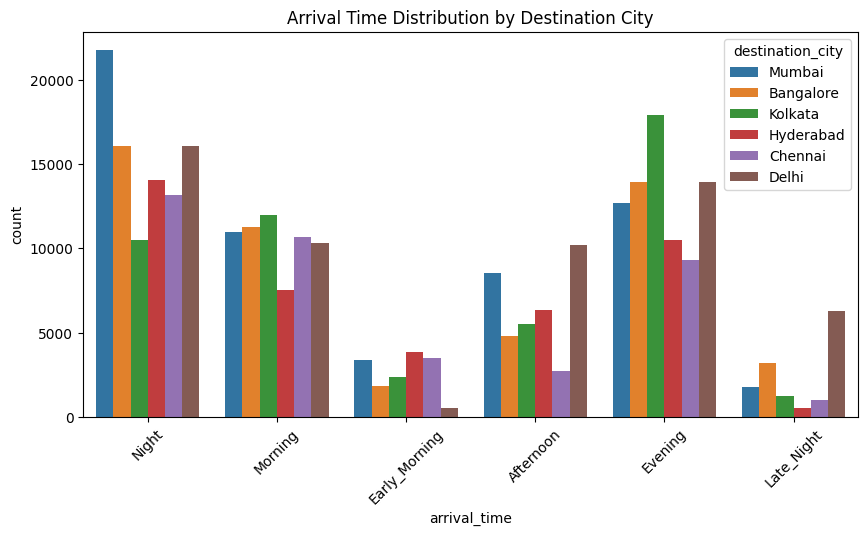

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=eda, x='departure_time', hue='source_city')
plt.title('Departure Time Distribution by Source City')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=eda, x='arrival_time', hue='destination_city')
plt.title('Arrival Time Distribution by Destination City')
plt.xticks(rotation=45)
plt.show()

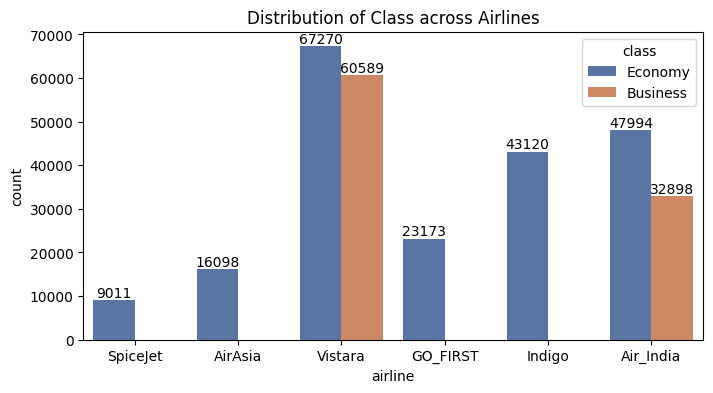

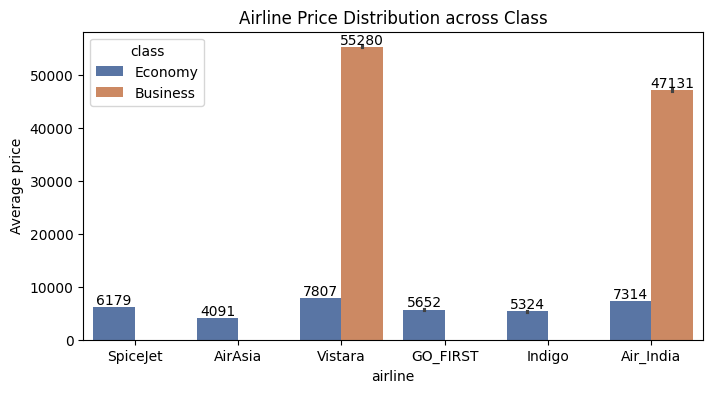

In [25]:
# Class distribution across airlines and class wise average price distribution across airlines
plt.figure(figsize=(8,4))
ax=sns.countplot(x=eda['airline'], hue=eda['class'], palette='deep')
for bar in ax.containers:
  ax.bar_label(bar)
plt.title('Distribution of Class across Airlines')
plt.show()

plt.figure(figsize = (8,4))
ax=sns.barplot(data=eda, x='airline', y='price', hue ='class', palette='deep')
for bar in ax.containers:
  ax.bar_label(bar, fmt='%.0f') #Using (fmt='%.0f') to remove the value after decimal
plt.title('Airline Price Distribution across Class')
plt.ylabel('Average price')
plt.show()

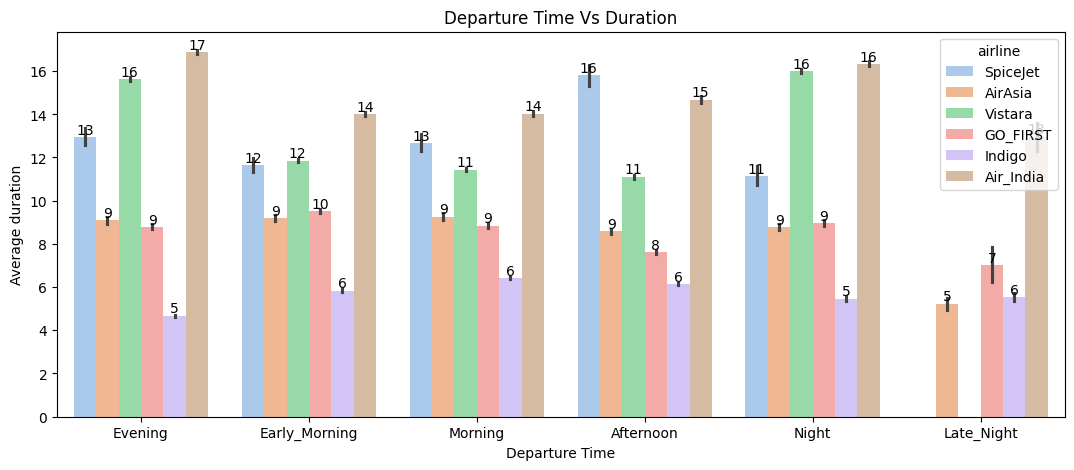

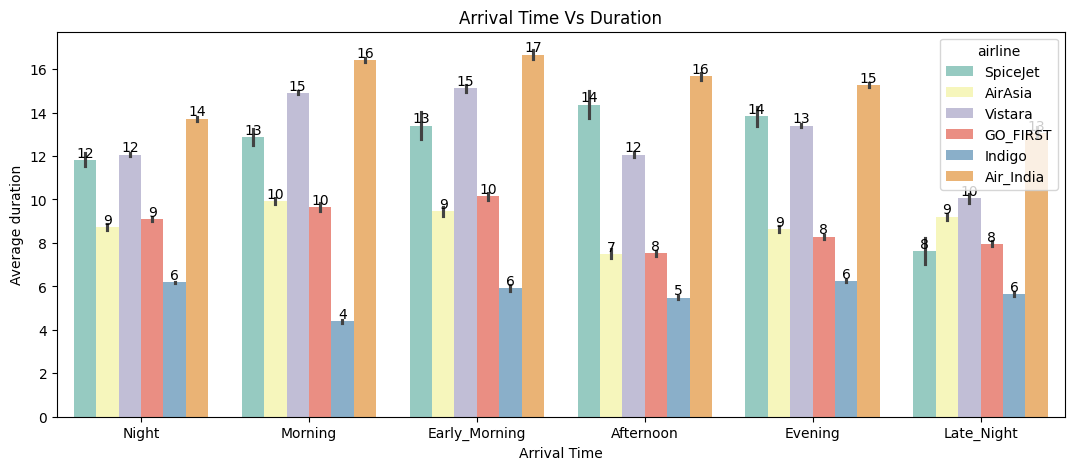

In [26]:
plt.figure(figsize = (13,5))
ax=sns.barplot(data=eda, x='departure_time', y='duration', hue ='airline', estimator='mean', palette='pastel')
for bar in ax.containers:
  ax.bar_label(bar, fmt='%.0f') #Using (fmt='%.0f') to remove the value after decimal
plt.title('Departure Time Vs Duration')
plt.xlabel('Departure Time')
plt.ylabel('Average duration')
plt.show()

plt.figure(figsize = (13,5))
ax=sns.barplot(data=eda, x='arrival_time', y='duration', hue ='airline', estimator='mean', palette='Set3')
for bar in ax.containers:
  ax.bar_label(bar, fmt='%.0f') #Using (fmt='%.0f') to remove the value after decimal
plt.title('Arrival Time Vs Duration')
plt.xlabel('Arrival Time')
plt.ylabel('Average duration')
plt.show()

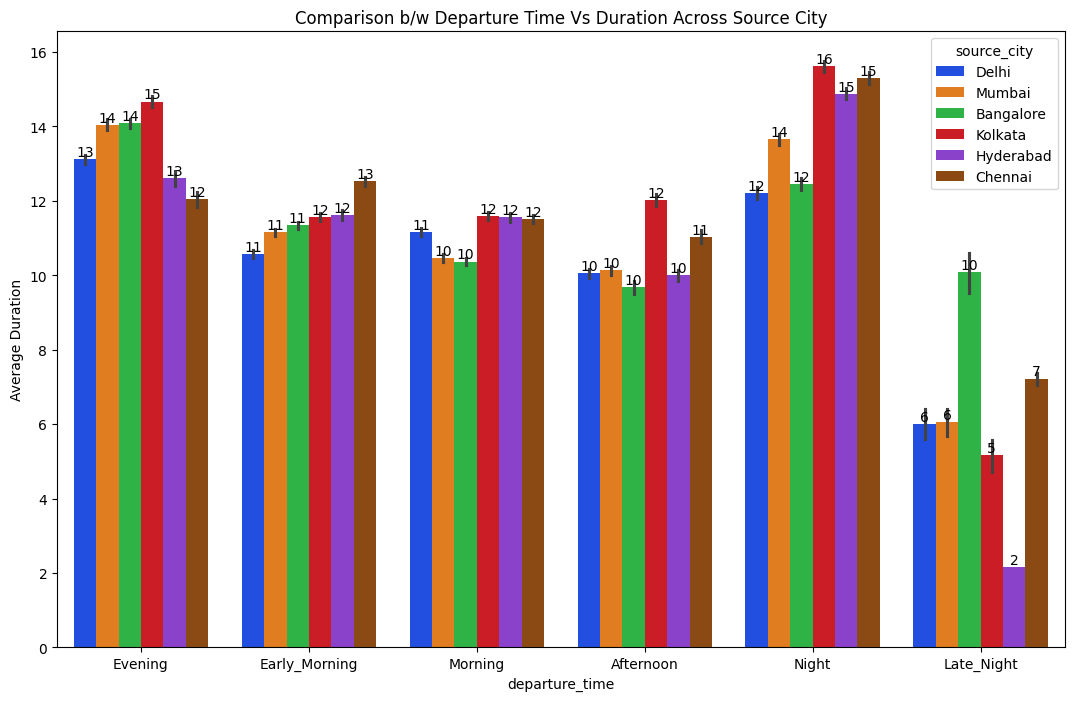

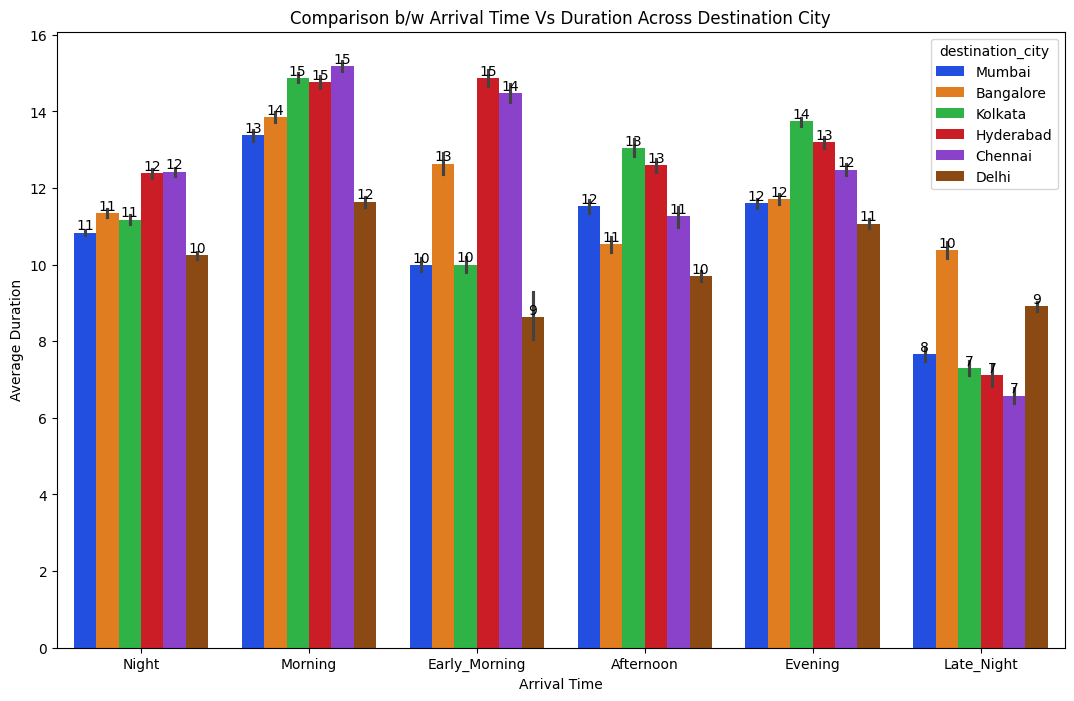

In [27]:
# Departure time comparison across source city and arrival time comparison across destination city
plt.figure(figsize = (13,8))
ax=sns.barplot(data=eda, x='departure_time', y='duration', hue ='source_city', estimator='mean', palette='bright')
for bar in ax.containers:
  ax.bar_label(bar, fmt='%.0f') #Using (fmt='%.0f') to remove the value after decimal
plt.title('Comparison b/w Departure Time Vs Duration Across Source City')
plt.xlabel('departure_time')
plt.ylabel('Average Duration')
plt.show()

plt.figure(figsize = (13,8))
ax=sns.barplot(data=eda, x='arrival_time', y='duration', hue ='destination_city', estimator='mean', palette='bright')
for bar in ax.containers:
  ax.bar_label(bar, fmt='%.0f') #Using (fmt='%.0f') to remove the value after decimal
plt.title('Comparison b/w Arrival Time Vs Duration Across Destination City')
plt.xlabel('Arrival Time')
plt.ylabel('Average Duration')
plt.show()

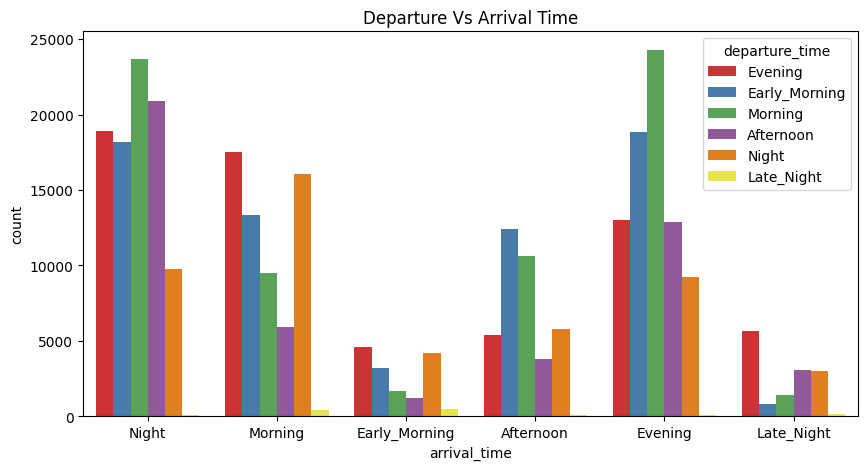

In [28]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=eda['arrival_time'], hue=eda['departure_time'], palette='Set1')
plt.title('Departure Vs Arrival Time')
plt.show()

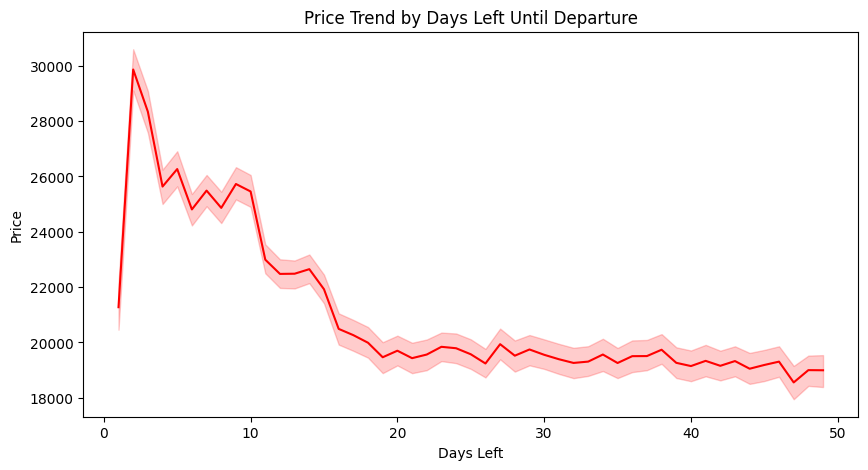

In [29]:
# Price trend by days left to depart the flights
plt.figure(figsize=(10, 5))
sns.lineplot(data=eda, x='days_left', y='price', color='red')
plt.title('Price Trend by Days Left Until Departure')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

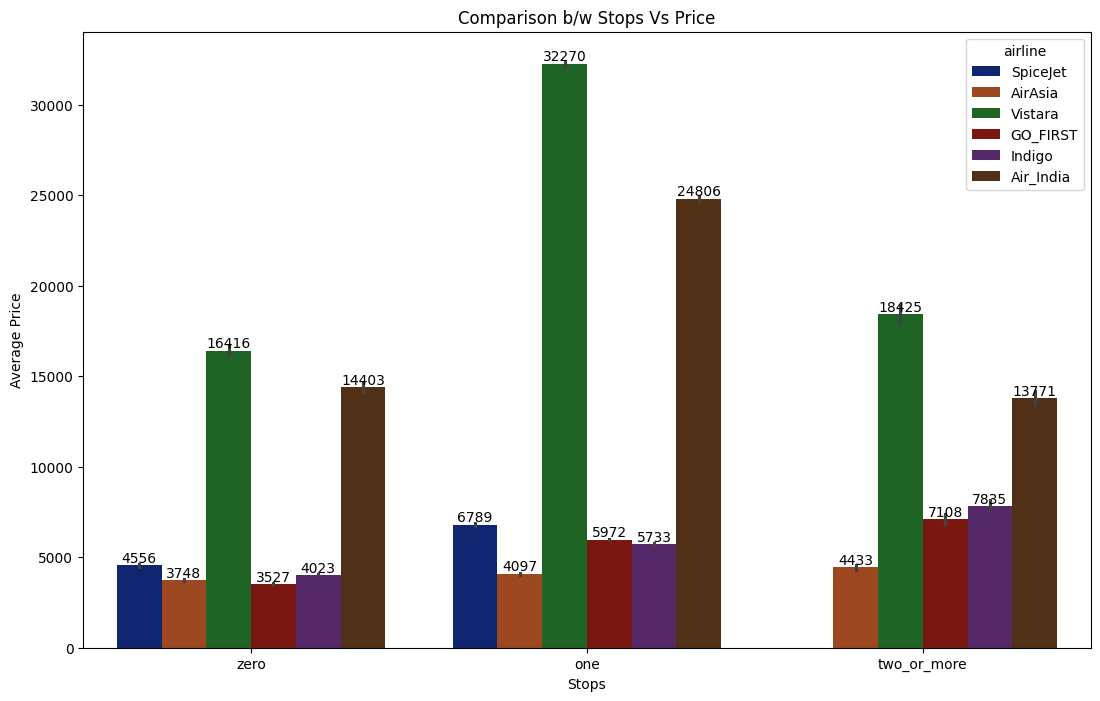

In [36]:
# Stop Vs Price Comparison --> here we can check the passenger count too, to know the behaviour by stops.
plt.figure(figsize = (13,8))
ax=sns.barplot(data=eda, x='stops', y='price', hue ='airline', estimator='mean', palette='dark')
for bar in ax.containers:
  ax.bar_label(bar, fmt='%.0f')
plt.title('Comparison b/w Stops Vs Price')
plt.xlabel('Stops')
plt.ylabel('Average Price')
plt.show()

In [43]:
## Bivariate Analysis

In [41]:
rout_count = eda.value_counts(['source_city','destination_city']).reset_index(name='flight_count')
rout_count['route'] = rout_count['source_city']+'->'+rout_count['destination_city']
rout_count

,source_city,destination_city,flight_count,route
0,Delhi,Mumbai,15289,Delhi->Mumbai
1,Mumbai,Delhi,14809,Mumbai->Delhi
2,Delhi,Bangalore,14012,Delhi->Bangalore
3,Bangalore,Delhi,13756,Bangalore->Delhi
4,Bangalore,Mumbai,12939,Bangalore->Mumbai
5,Mumbai,Bangalore,12885,Mumbai->Bangalore
6,Mumbai,Kolkata,12602,Mumbai->Kolkata
7,Delhi,Kolkata,11934,Delhi->Kolkata
8,Kolkata,Mumbai,11467,Kolkata->Mumbai
9,Delhi,Chennai,10780,Delhi->Chennai


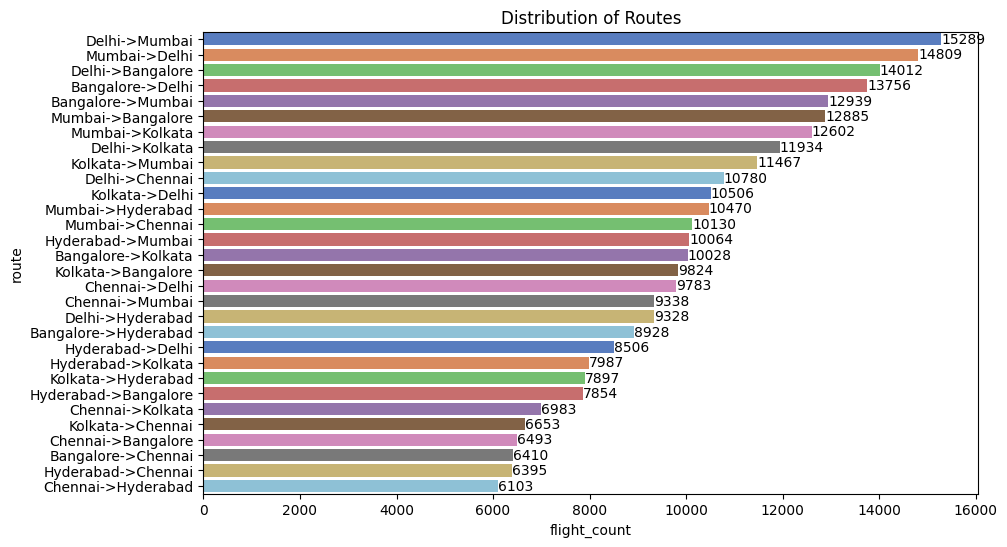

In [54]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=rout_count, x='flight_count', y='route', hue='route', palette='muted')
for bar in ax.containers:
  ax.bar_label(bar)
plt.title('Distribution of Routes')
plt.xlabel('flight_count')
plt.ylabel('route')
plt.show()

In [53]:
route_time=eda.value_counts(['departure_time','arrival_time']).reset_index(name='flight_count')
route_time['time'] = route_time['departure_time']+'->'+route_time['arrival_time']
route_time

,departure_time,arrival_time,flight_count,time
0,Morning,Evening,24289,Morning->Evening
1,Morning,Night,23680,Morning->Night
2,Afternoon,Night,20915,Afternoon->Night
3,Evening,Night,18924,Evening->Night
4,Early_Morning,Evening,18866,Early_Morning->Evening
5,Early_Morning,Night,18161,Early_Morning->Night
6,Evening,Morning,17498,Evening->Morning
7,Night,Morning,16076,Night->Morning
8,Early_Morning,Morning,13343,Early_Morning->Morning
9,Evening,Evening,13003,Evening->Evening


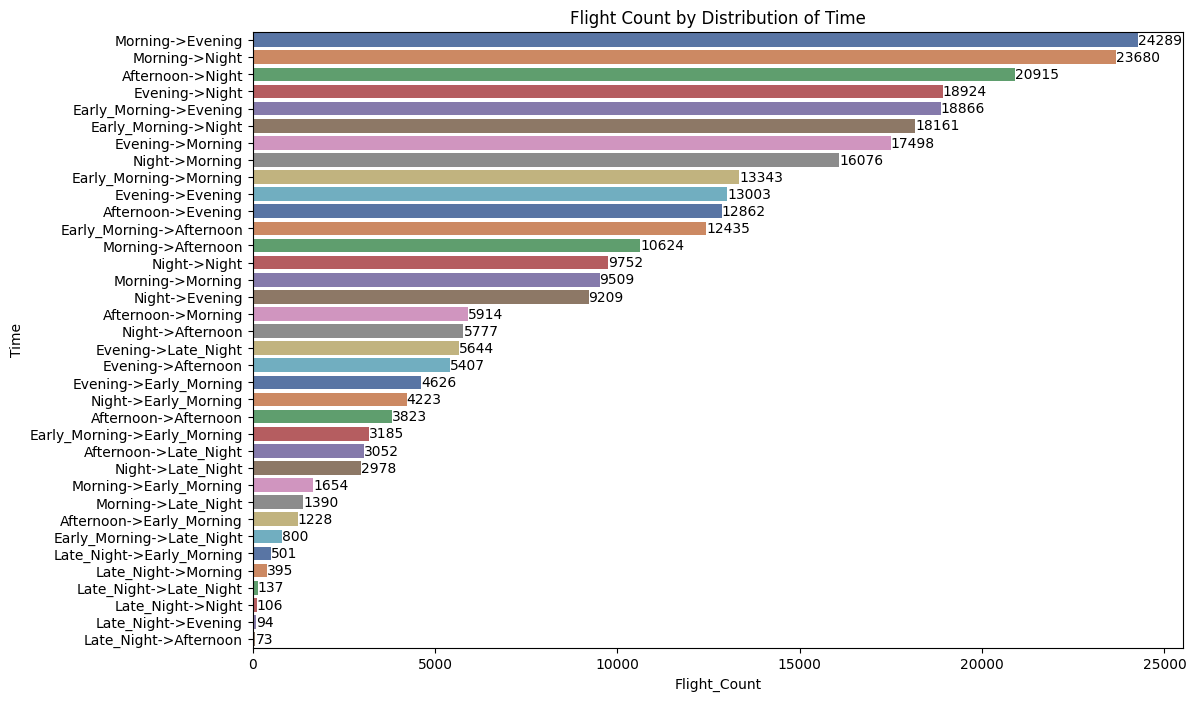

In [55]:
plt.figure(figsize=(12,8))
ax=sns.barplot(data=route_time, x='flight_count', y='time', hue='time', palette='deep')
for bar in ax.containers:
  ax.bar_label(bar)
plt.title('Flight Count by Distribution of Time')
plt.xlabel('Flight_Count')
plt.ylabel('Time')
plt.show()

In [57]:
sourcedepart = eda.value_counts(['source_city', 'departure_time']).reset_index(name='flight_count')
sourcedepart['sourcedepart']=sourcedepart['source_city']+'->'+sourcedepart['departure_time']
sourcedepart

,source_city,departure_time,flight_count,sourcedepart
0,Delhi,Evening,16790,Delhi->Evening
1,Mumbai,Early_Morning,14955,Mumbai->Early_Morning
2,Bangalore,Evening,14243,Bangalore->Evening
3,Delhi,Morning,13679,Delhi->Morning
4,Bangalore,Early_Morning,13611,Bangalore->Early_Morning
5,Mumbai,Evening,13082,Mumbai->Evening
6,Mumbai,Morning,12606,Mumbai->Morning
7,Bangalore,Morning,12323,Bangalore->Morning
8,Delhi,Early_Morning,12248,Delhi->Early_Morning
9,Kolkata,Morning,12065,Kolkata->Morning


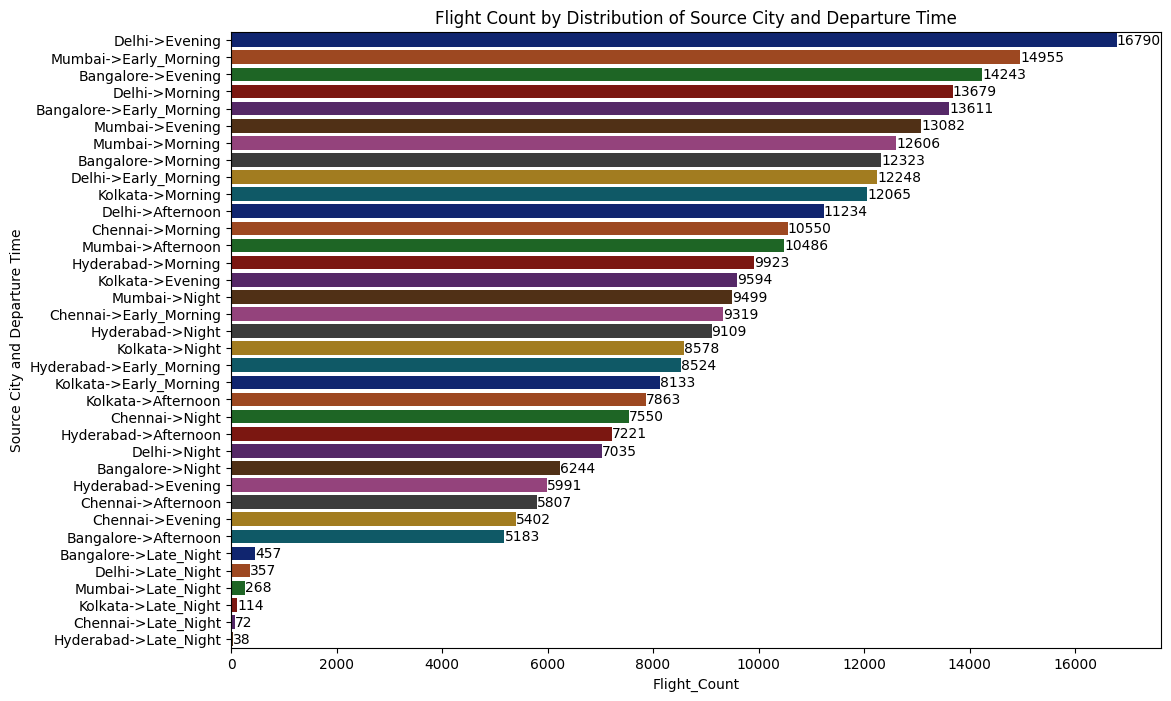

In [71]:
plt.figure(figsize=(12,8))
ax=sns.barplot(data=sourcedepart, x='flight_count', y='sourcedepart', hue='sourcedepart', palette='dark')
for bar in ax.containers:
  ax.bar_label(bar)
plt.title('Flight Count by Distribution of Source City and Departure Time')
plt.xlabel('Flight_Count')
plt.ylabel('Source City and Departure Time')
plt.show()

In [70]:
airline_class_price = eda.groupby(['class','airline']).agg({'price':'sum'})/(1e7)
airline_class_price.reset_index()
airline_class_price

price
class    airline              
Business Air_India  155.051693
         Vistara    334.934030
Economy  AirAsia      6.585809
         Air_India   35.101286
         GO_FIRST    13.097397
         Indigo      22.958021
         SpiceJet     5.568148
         Vistara     52.517310

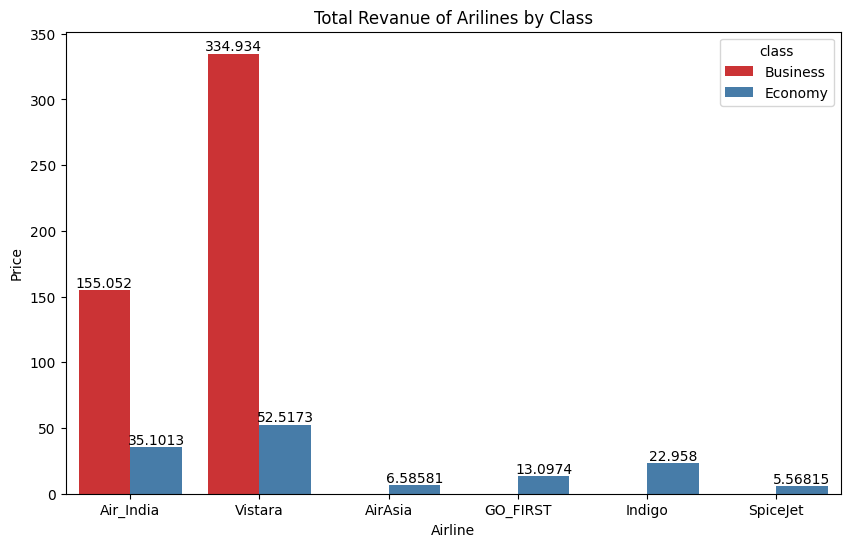

In [74]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=airline_class_price, x='airline', y='price', hue='class', palette='Set1')
for bar in ax.containers:
  ax.bar_label(bar)
plt.title('Total Revanue of Arilines by Class')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

In [77]:
eda['arrival_desti']=eda['arrival_time']+'->'+eda['destination_city']
eda.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,arrival_desti
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0,Night->Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0,Morning->Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0,Early_Morning->Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0,Afternoon->Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0,Morning->Mumbai


In [79]:
arrival_route_price_cr=(eda.groupby('arrival_desti')['price'].sum()/1e7).round(2).sort_values(ascending=False)
arrival_route_price_cr

,price
arrival_desti,
Night->Mumbai,52.59
Evening->Kolkata,48.02
Night->Bangalore,37.05
Night->Chennai,31.32
Night->Delhi,30.90
Evening->Bangalore,30.68
Morning->Kolkata,29.54
Evening->Mumbai,27.47
Night->Hyderabad,26.86


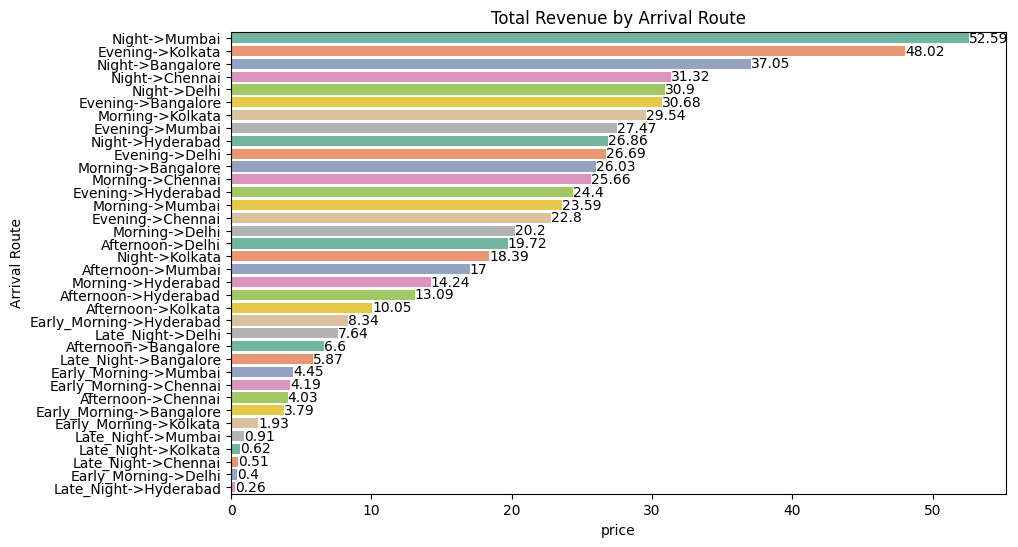

In [89]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=arrival_route_price_cr, y=arrival_route_price_cr.index, hue=arrival_route_price_cr.index, palette='Set2')
for bar in ax.containers:
  ax.bar_label(bar)
plt.xlabel('price')
plt.ylabel('Arrival Route')
plt.title('Total Revenue by Arrival Route')
plt.show()

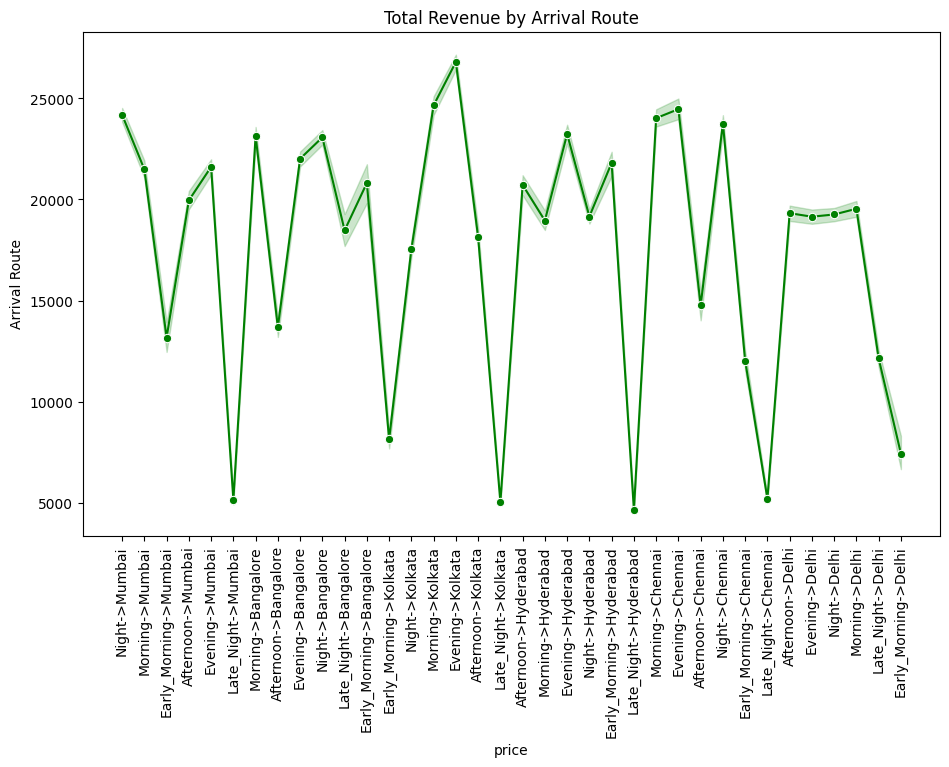

In [104]:
plt.figure(figsize=(10,6))
sns.lineplot(data=eda, x='arrival_desti', y='price', marker='o', color='green')
plt.xlabel('price')
plt.ylabel('Arrival Route')
plt.title('Total Revenue by Arrival Route')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [105]:
num_cols=eda.select_dtypes(include='number')
cor_matrix=num_cols.corr()
cor_matrix

,duration,days_left,price
duration,1.000000,-0.033722,0.214814
days_left,-0.033722,1.000000,-0.089896
price,0.214814,-0.089896,1.000000


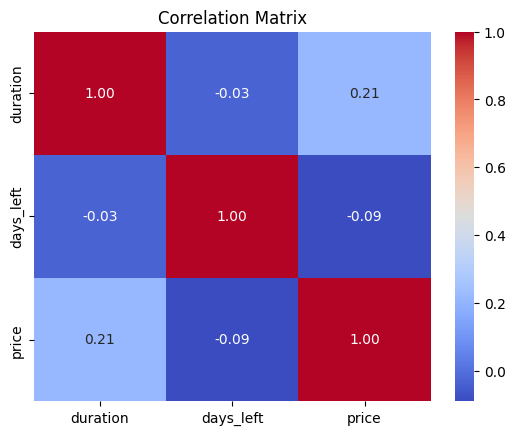

In [111]:
sns.heatmap(cor_matrix,annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

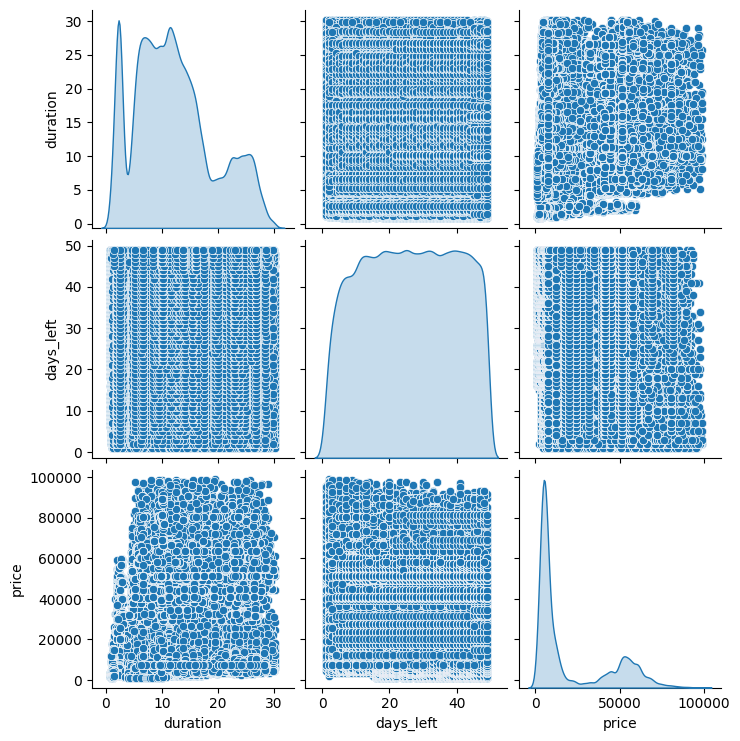

In [112]:
sns.pairplot(eda, diag_kind='kde')